# X Education Lead Scoring Project



## Step 1: Importing and Understanding the Data



In [1]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Importing Data

In [3]:
# Loading dataset
lead_data=pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2: Inspecting the Dataframe

In [4]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_data.shape

(9240, 37)

In [7]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
lead_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [9]:
lead_data.replace('Select', np.NaN,inplace=True)


In [10]:
lead_data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

## 3: Data Preparation

### Missing Values Treatment
Deleting columns with more then 50% missing values and imputing missing values in categorical columns

In [11]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Null values sorted for each Columns
lead_data.isna().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [13]:
# % of Null values
percent_null = lead_data.isnull().sum().sort_values(ascending=False)*100/len(lead_data)
percent_null[percent_null>0]

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
#Drop column with more then 50% missing values
len(lead_data)*.5

4620.0

In [15]:
# drop column 'How did you hear about X Education', 'Lead Quality' and 'Lead Profile'
lead_data.drop(['How did you hear about X Education','Lead Profile','Lead Quality'],axis=1,inplace=True)
lead_data.isna().sum().sort_values(ascending=False)

Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website 

Since this analysis is all around the leads which were generated just after submitting the form, we can drop all the columns which were created post the Sales call with the Leads. These columns are:
- All 'Asymmetrique...' columns
- Tags
- Last Notable Activity

In [16]:

lead_data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Tags','Last Notable Activity'],axis=1,inplace=True)

lead_data.isna().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Search                                              0
Magazine                    

In [17]:
lead_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can drop City column as it is not making much sense as most of the cities are of Maharashtra & rest are null

In [18]:
lead_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Uganda                     2
Netherlands                2
Bangladesh                 2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Belgium                    2
Philippines                2
China                      2
Vietnam                    1
Malaysia                   1
Russia                     1
Kenya                      1
Denmark                    1
Sri Lanka                  1
Switzerland   

We can even drop countries because from the total records, 70% is India, 27% are missing & rest 3% are other countries

In [19]:
# Drop 'Country' and 'City'
lead_data.drop(['City','Country'],axis=1,inplace=True)
lead_data.isna().sum().sort_values(ascending=False)

Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
Total Time Spent on Website                         0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [20]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# drop column 'What matters most to you in choosing a course' as it has only one value in excess
lead_data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [22]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Impute missing values in 'What is your current occupation' with 'Other' and add 'Housewife' and 'Businessman' to Others.

In [23]:
lead_data['What is your current occupation'].fillna('Others',inplace=True)
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(['Housewife','Businessman'],'Other')
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Others                  2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [24]:
lead_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Impute missing values in 'Specialization' by 'Others' and convert 'Rural and Agribusiness' ,'E-Business' and 'Services Excellence'  to Others.

In [25]:
lead_data.Specialization.fillna('Others',inplace=True)
lead_data.Specialization.replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Others',inplace=True)
lead_data.Specialization.value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

In [26]:
lead_data.isna().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
A free copy of Mastering The Interview        0
Specialization                                0
Lead Number                                   0
Lead Origin                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
Total Time Spent on Website                   0
What is your current occupation               0
I agree to pay the amount through cheque      0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [27]:
lead_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [28]:
lead_data['Last Activity'].mode()

0    Email Opened
dtype: object

In [29]:
# Impute missing values in 'Last Activity' with mode 'Email Opened'
lead_data['Last Activity'].fillna('Email Opened',inplace=True)

In [30]:
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Replace missing values in 'Lead Source' by 'Others'
Also add 'Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','NC_EDM', 'testone','youtubechannel','welearnblog_Home','Pay per Click Ads','blog','WeLearn' columns to "Others'

In [31]:
lead_data['Lead Source'].mode()
lead_data['Lead Source'].fillna('Others',inplace=True)
lead_data['Lead Source'].replace('google','Google',inplace=True)
lead_data['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','NC_EDM',
                                  'testone','youtubechannel','welearnblog_Home','Pay per Click Ads','blog','WeLearn'],
                                 'Others',inplace=True)
lead_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [32]:
lead_data.isna().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
A free copy of Mastering The Interview        0
Specialization                                0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
Total Time Spent on Website                   0
Last Activity                                 0
What is your current occupation               0
I agree to pay the amount through cheque      0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

### Check for biased/skewed data

In [33]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [34]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [35]:
lead_data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [36]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [37]:
lead_data.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [38]:
lead_data.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
lead_data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [40]:
lead_data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [41]:
lead_data.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [42]:
lead_data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [43]:
lead_data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [44]:
9226/9240

0.9984848484848485

In [45]:
# We can drop all the above columns as more then 99.8% entries have same value.
lead_data.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','Magazine','Search','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [46]:
lead_data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [47]:
lead_data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [48]:
#drop 'Do Not Call' column
lead_data.drop('Do Not Call',axis=1,inplace=True)

In [49]:
lead_data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [50]:
lead_data['Total Time Spent on Website'].value_counts()

0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [51]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Check if all the entries are unique

In [52]:
lead_data['Lead Number'].value_counts().sort_values(ascending=True)

608255    1
624575    1
651250    1
606054    1
585722    1
         ..
651270    1
649221    1
598020    1
618670    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64

In [53]:
lead_data['Prospect ID'].value_counts().sort_values(ascending=True)

762496da-6cf6-40be-9258-802c6ba6ab6e    1
1e586d41-4d10-4adb-8919-607a49d527b8    1
a7e2ecde-75aa-42ef-8f64-29ecf1a1d74f    1
2611e818-addd-489b-a41e-0841b501fba8    1
6775174e-d36f-411f-a634-4378e4281854    1
                                       ..
de276444-b7f8-4edc-b359-8daec3f0b761    1
468de7b0-e59b-43df-8327-9df9ae7833b4    1
3f715465-2546-47cd-afa8-8b8dc63b8b43    1
5f21a5af-814c-4dc9-b28e-e42af3e34507    1
eff53099-21b1-4522-8aeb-258a6a539af5    1
Name: Prospect ID, Length: 9240, dtype: int64

##### All Entries are Unique

In [54]:
# We only need 1 out of 2 columns 'Prospect ID' and 'Lead Number'
# Drop 'Prospect ID'
lead_data.drop('Prospect ID',axis=1,inplace=True)

In [55]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 866.4+ KB


In [56]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [57]:
list(lead_data.describe().columns)

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [58]:
num=list(lead_data.describe().columns)[1:]
num

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [59]:
cat=list(lead_data.select_dtypes(include='object').columns)
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

## Outliers Treatment

### Checking Outliers in Numeric columns

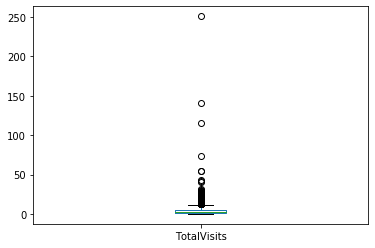

In [60]:
lead_data['TotalVisits'].plot.box()
plt.show()

In [61]:
lead_data['TotalVisits'].quantile(0.99)

17.0

In [62]:
lead_data[lead_data['TotalVisits']>17]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
345,656743,Landing Page Submission,Organic Search,No,1,21.0,1113,2.63,Email Opened,Operations Management,Unemployed,Yes
469,655360,Landing Page Submission,Organic Search,No,0,22.0,59,5.50,Page Visited on Website,Human Resource Management,Unemployed,Yes
663,653687,Landing Page Submission,Google,No,1,21.0,1885,3.50,Email Opened,Business Administration,Unemployed,Yes
767,652507,API,Organic Search,No,0,19.0,415,4.75,Page Visited on Website,Others,Others,No
896,650892,Landing Page Submission,Direct Traffic,No,1,18.0,59,2.57,Email Opened,Business Administration,Unemployed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8619,583969,Landing Page Submission,Organic Search,No,0,18.0,264,6.00,SMS Sent,Human Resource Management,Unemployed,Yes
8624,583931,Landing Page Submission,Google,No,1,27.0,573,1.93,Page Visited on Website,Business Administration,Unemployed,Yes
8684,583534,API,Google,No,1,23.0,1341,2.09,SMS Sent,Others,Others,No
8827,582560,Landing Page Submission,Organic Search,No,0,23.0,194,11.50,Email Opened,Finance Management,Unemployed,Yes


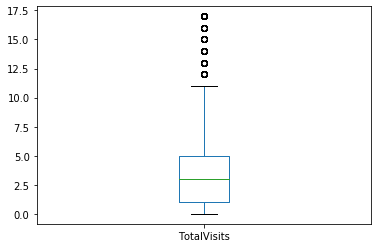

In [63]:
#apply soft capping on outliers in 'TotalVisits'
q1=lead_data['TotalVisits'].quantile(0.01)
q2=lead_data['TotalVisits'].quantile(0.99)
lead_data.TotalVisits[lead_data.TotalVisits<q1]=q1
lead_data.TotalVisits[lead_data.TotalVisits>q2]=q2
lead_data['TotalVisits'].plot.box()
plt.show()

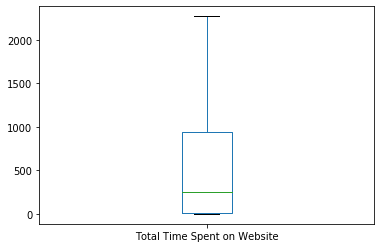

In [64]:
lead_data['Total Time Spent on Website'].plot.box()
plt.show()

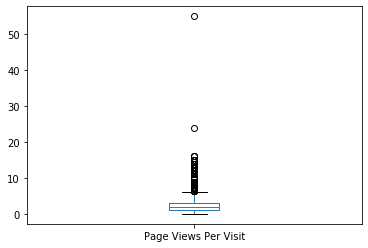

In [65]:
lead_data['Page Views Per Visit'].plot.box()
plt.show()

In [66]:
lead_data['Page Views Per Visit'].quantile(0.99)

9.0

In [67]:
lead_data[lead_data['Page Views Per Visit']>9]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
12,660562,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Marketing Management,Unemployed,No
56,659998,Landing Page Submission,Referral Sites,No,1,13.0,436,13.0,Form Submitted on Website,IT Projects Management,Unemployed,No
125,659241,API,Referral Sites,No,0,16.0,53,16.0,Olark Chat Conversation,Others,Others,No
168,658756,Landing Page Submission,Referral Sites,No,0,12.0,493,12.0,Email Link Clicked,Marketing Management,Others,Yes
246,657882,API,Referral Sites,No,0,14.0,354,14.0,Unreachable,Others,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...,...
8322,586343,Landing Page Submission,Organic Search,No,1,14.0,1584,14.0,SMS Sent,Travel and Tourism,Others,Yes
8381,585851,Landing Page Submission,Direct Traffic,No,0,10.0,793,10.0,Email Opened,Business Administration,Unemployed,Yes
8640,583774,Landing Page Submission,Organic Search,No,0,15.0,1042,15.0,SMS Sent,Retail Management,Unemployed,Yes
8827,582560,Landing Page Submission,Organic Search,No,0,17.0,194,11.5,Email Opened,Finance Management,Unemployed,Yes


In [68]:
lead_data['Page Views Per Visit'].quantile(0.95)

6.0

In [69]:
lead_data[lead_data['Page Views Per Visit']>6]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
10,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.0,Email Opened,Travel and Tourism,Unemployed,Yes
12,660562,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Marketing Management,Unemployed,No
41,660222,Landing Page Submission,Organic Search,Yes,0,7.0,38,7.0,Unsubscribed,Retail Management,Unemployed,Yes
56,659998,Landing Page Submission,Referral Sites,No,1,13.0,436,13.0,Form Submitted on Website,IT Projects Management,Unemployed,No
57,659963,API,Referral Sites,No,1,8.0,903,8.0,Page Visited on Website,Finance Management,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,580407,Landing Page Submission,Organic Search,No,0,9.0,82,9.0,Email Opened,Human Resource Management,Unemployed,Yes
9151,580278,Landing Page Submission,Google,No,0,7.0,133,7.0,SMS Sent,Marketing Management,Unemployed,No
9215,579802,Landing Page Submission,Organic Search,No,0,8.0,397,8.0,Email Opened,Business Administration,Others,Yes
9223,579755,API,Organic Search,No,0,7.0,142,7.0,Email Opened,Operations Management,Unemployed,Yes


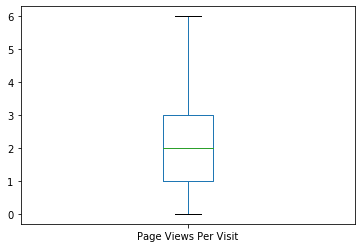

In [70]:
#Apply hard capping on 'Page Views Per Visit'
q1=lead_data['Page Views Per Visit'].quantile(0.05)
q2=lead_data['Page Views Per Visit'].quantile(0.95)
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']<q1]=q1
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']>q2]=q2
lead_data['Page Views Per Visit'].plot.box()
plt.show()

Imputing missing values in numeric columns.

In [71]:
lead_data.TotalVisits.describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [72]:
# Fill missing values in TotalVisits by median value '3'
lead_data.TotalVisits.fillna(3,inplace=True)

In [73]:
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.258944
std         1.792536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

In [74]:
# Impute missing values in 'Page Views Per Visit' by median '2'
lead_data['Page Views Per Visit'].fillna(2,inplace=True)

In [75]:
lead_data.isna().sum().sort_values(ascending=False)

A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Lead Number                               0
dtype: int64

## Our data is now Cleaned

### Check for Class Imbalance


In [76]:
len(lead_data[lead_data.Converted==1])

3561

In [77]:
len(lead_data[lead_data.Converted==0])

5679

In [78]:
print('Imbalance level in this dataset is')
len(lead_data[lead_data.Converted==0])/len(lead_data[lead_data.Converted==1])

Imbalance level in this dataset is


1.594776748104465

## 4: EDA

**Let's analyse the data at various levels - Univariate, Bivariate & Multivariaate Analysis**

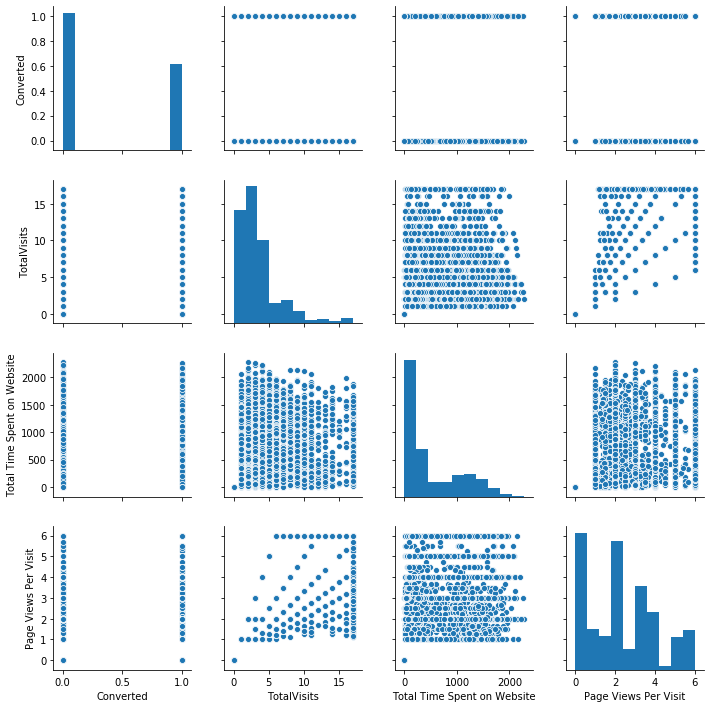

In [79]:
# Building Pair plot of numeric features 
sns.pairplot(lead_data[num])

There are not any high correlations in numeric columns.

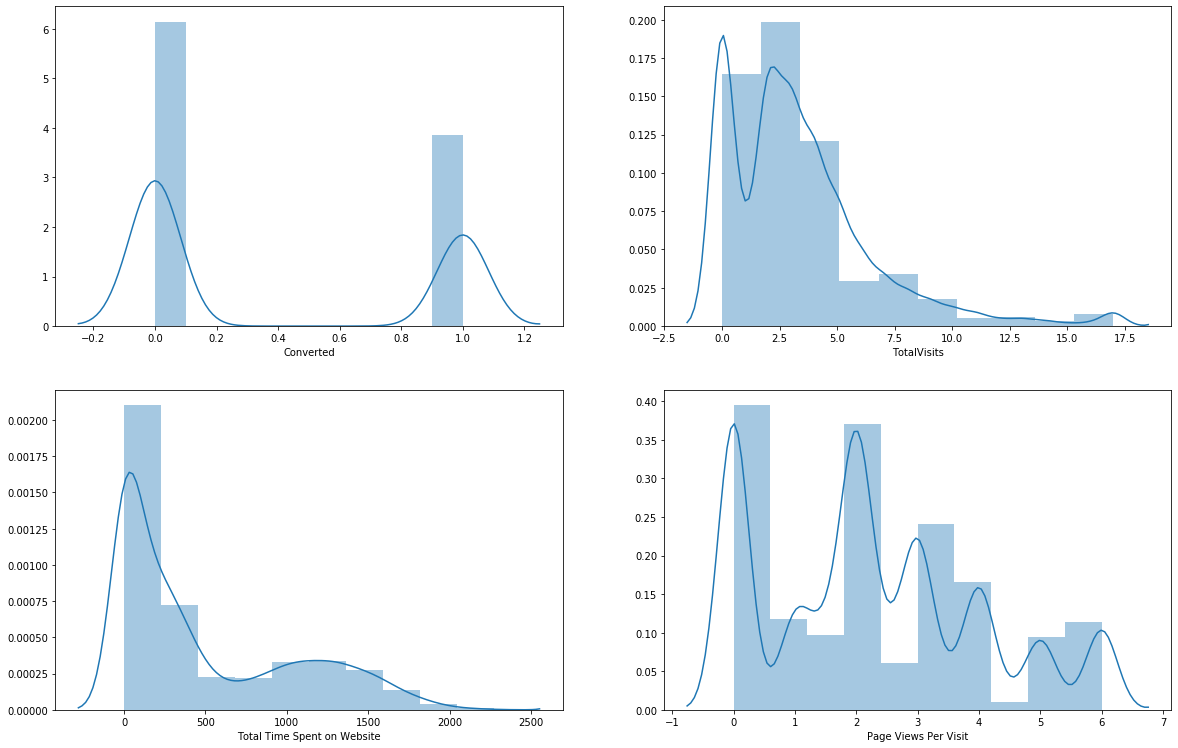

In [80]:
#Building distribution plot of numeric variables
plt.figure(figsize=(20,20))
for i in range(len(num)):
    plt.subplot(3,2,i+1)
    sns.distplot(lead_data[num[i]],bins=10)

* From the distribution plot, we can see that the spread of Total Visits & Total Time Spent per Visit both are right/positive skewed.
* It seems that most of the leads are not frequent visitors & their average engagement(time spent & page views per visit) on he website is slightly on a lower side.


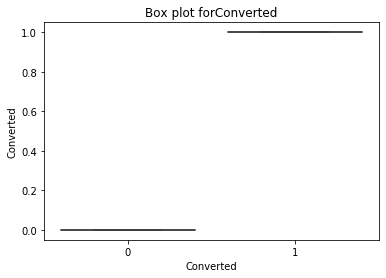

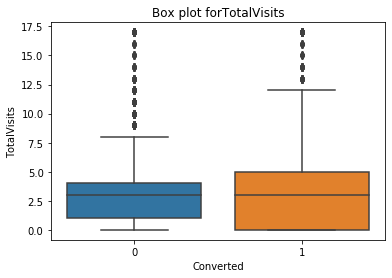

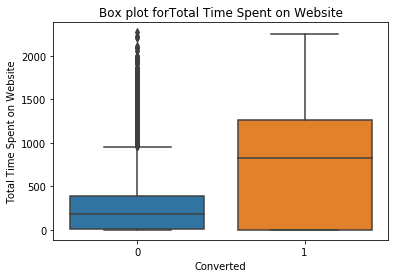

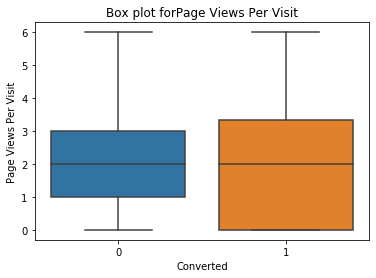

In [81]:
# Building the box plot of numeric variables
for i in num:
    sns.boxplot(x='Converted',y=i,data=lead_data)
    plt.title('Box plot for'+i)
    plt.show()


* It is evident that leads who got converted have visited & engaged more on the website & therefore have higher no. of visits & time spent on website compared to the non-converted leads.
* For ‘Page Views per Visit’ metric, we can say that it is slightly better for converted leads. But otherwise, there doesn’t seems to be a major difference we can notice for this metric between converted & non-converted leads.

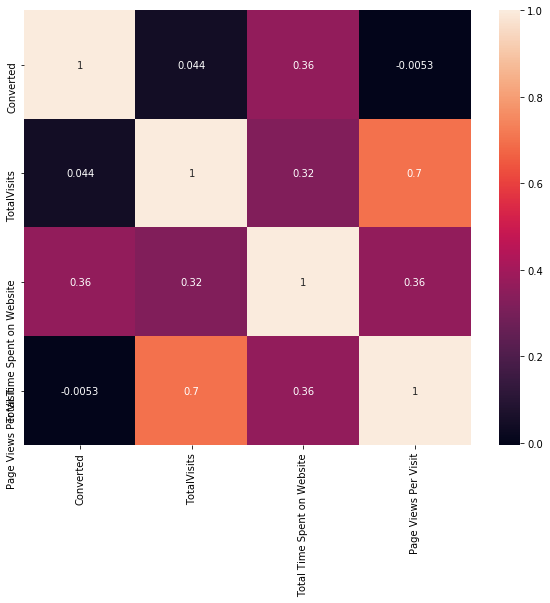

In [82]:
# Building the heatmap of correlation between the numeric variables
plt.figure(figsize = (10,8))        # Size of the figure
ax = sns.heatmap(lead_data[num].corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In terms of correlation, from the correlation matrix, we have noticed a decent correlation of 0.7 between ‘Total Visits’ & ‘Page Views per Visit’ features. Otherwise, there isn’t any major correlations we could see between the numeric variables.

### Univariate analysis of categorical columns.

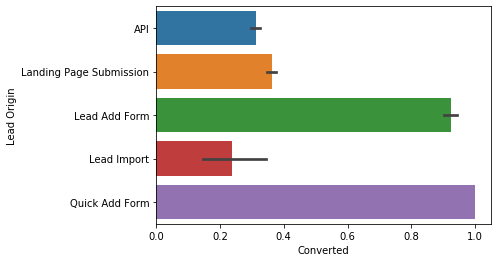

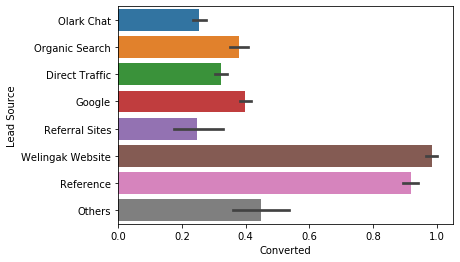

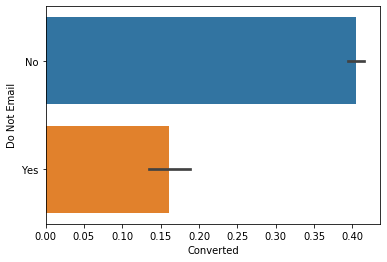

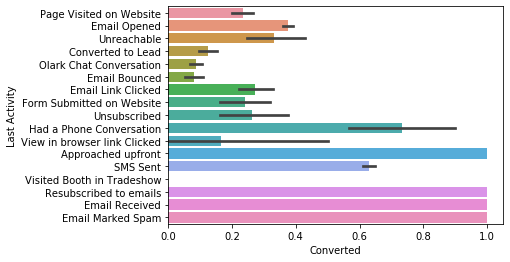

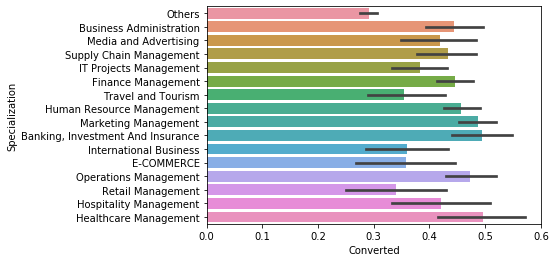

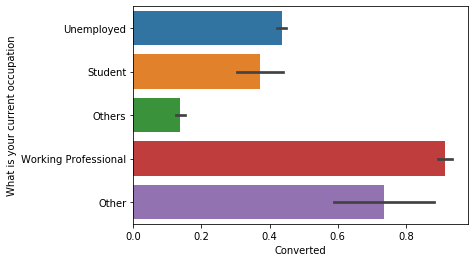

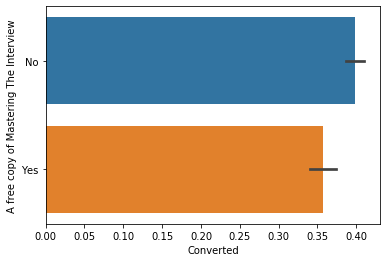

In [83]:
#Plotting conversion rates for all categorical columns
for i in range(len(cat)):
    sns.barplot(x='Converted',y=cat[i],data=lead_data)
    plt.show()

#### Here, we plotted each categorical feature with respect to their respective conversion rate.

* It has been observed that ‘Working Professions’ leads have higher conversion rate than anyone else.
* Leads who have come from ‘Welingak website’ or through some ‘Reference’ had relatively higher conversion rate.
* Leads who have their specialization in ‘Healthcare Management’ or ‘Banking Investments & Insurance’ have a higher chances of conversion.

## Data preparation for Model building

## 5: Creating Dummy Variables

In [84]:
lead_dummies=pd.get_dummies(lead_data[cat],drop_first=True)
lead_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [85]:
lead_dummies.shape

(9240, 48)

In [86]:
lead_dummies.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activi

In [87]:
#concatinating the dummies with the main dataframe
Lead=pd.concat([lead_data,lead_dummies],axis=1)
Lead

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Others,...,0,1,0,0,0,0,0,1,0,0
1,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Others,...,0,1,0,0,0,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,1,0,0,1
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Others,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,1,0,0
9236,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,0,1,0,1
9237,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,0,1,0,1
9238,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,1,0,0,0,0


In [88]:
# Dropping the original columns after adding dummies 
Lead.drop(cat,axis=1,inplace=True)
Lead

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,660727,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,660719,0,1.0,305,1.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9237,579545,0,2.0,199,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9238,579538,1,3.0,499,3.00,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## 6: Test-Train Split

In [89]:
# Imorting the relevant libraries
from sklearn.model_selection import train_test_split

In [90]:
# Putting feature variables to X
X = Lead.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [91]:
# Putting response variable to y
y = Lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 7: Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
#Scaling the train dataset
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,-1.022595,-0.885371,-1.266675,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.205373,0.005716,-0.516439,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3516,0.512365,-0.691418,0.143543,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8105,0.512365,1.365219,1.553761,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3934,-1.022595,-0.885371,-1.266675,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [95]:
#Scaling the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
4269,1.433341,0.964504,2.117849,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2376,-1.022595,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.553761,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9199,-1.022595,-0.885371,-1.266675,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4359,-1.022595,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 8: Checking Correlations in dummy variables

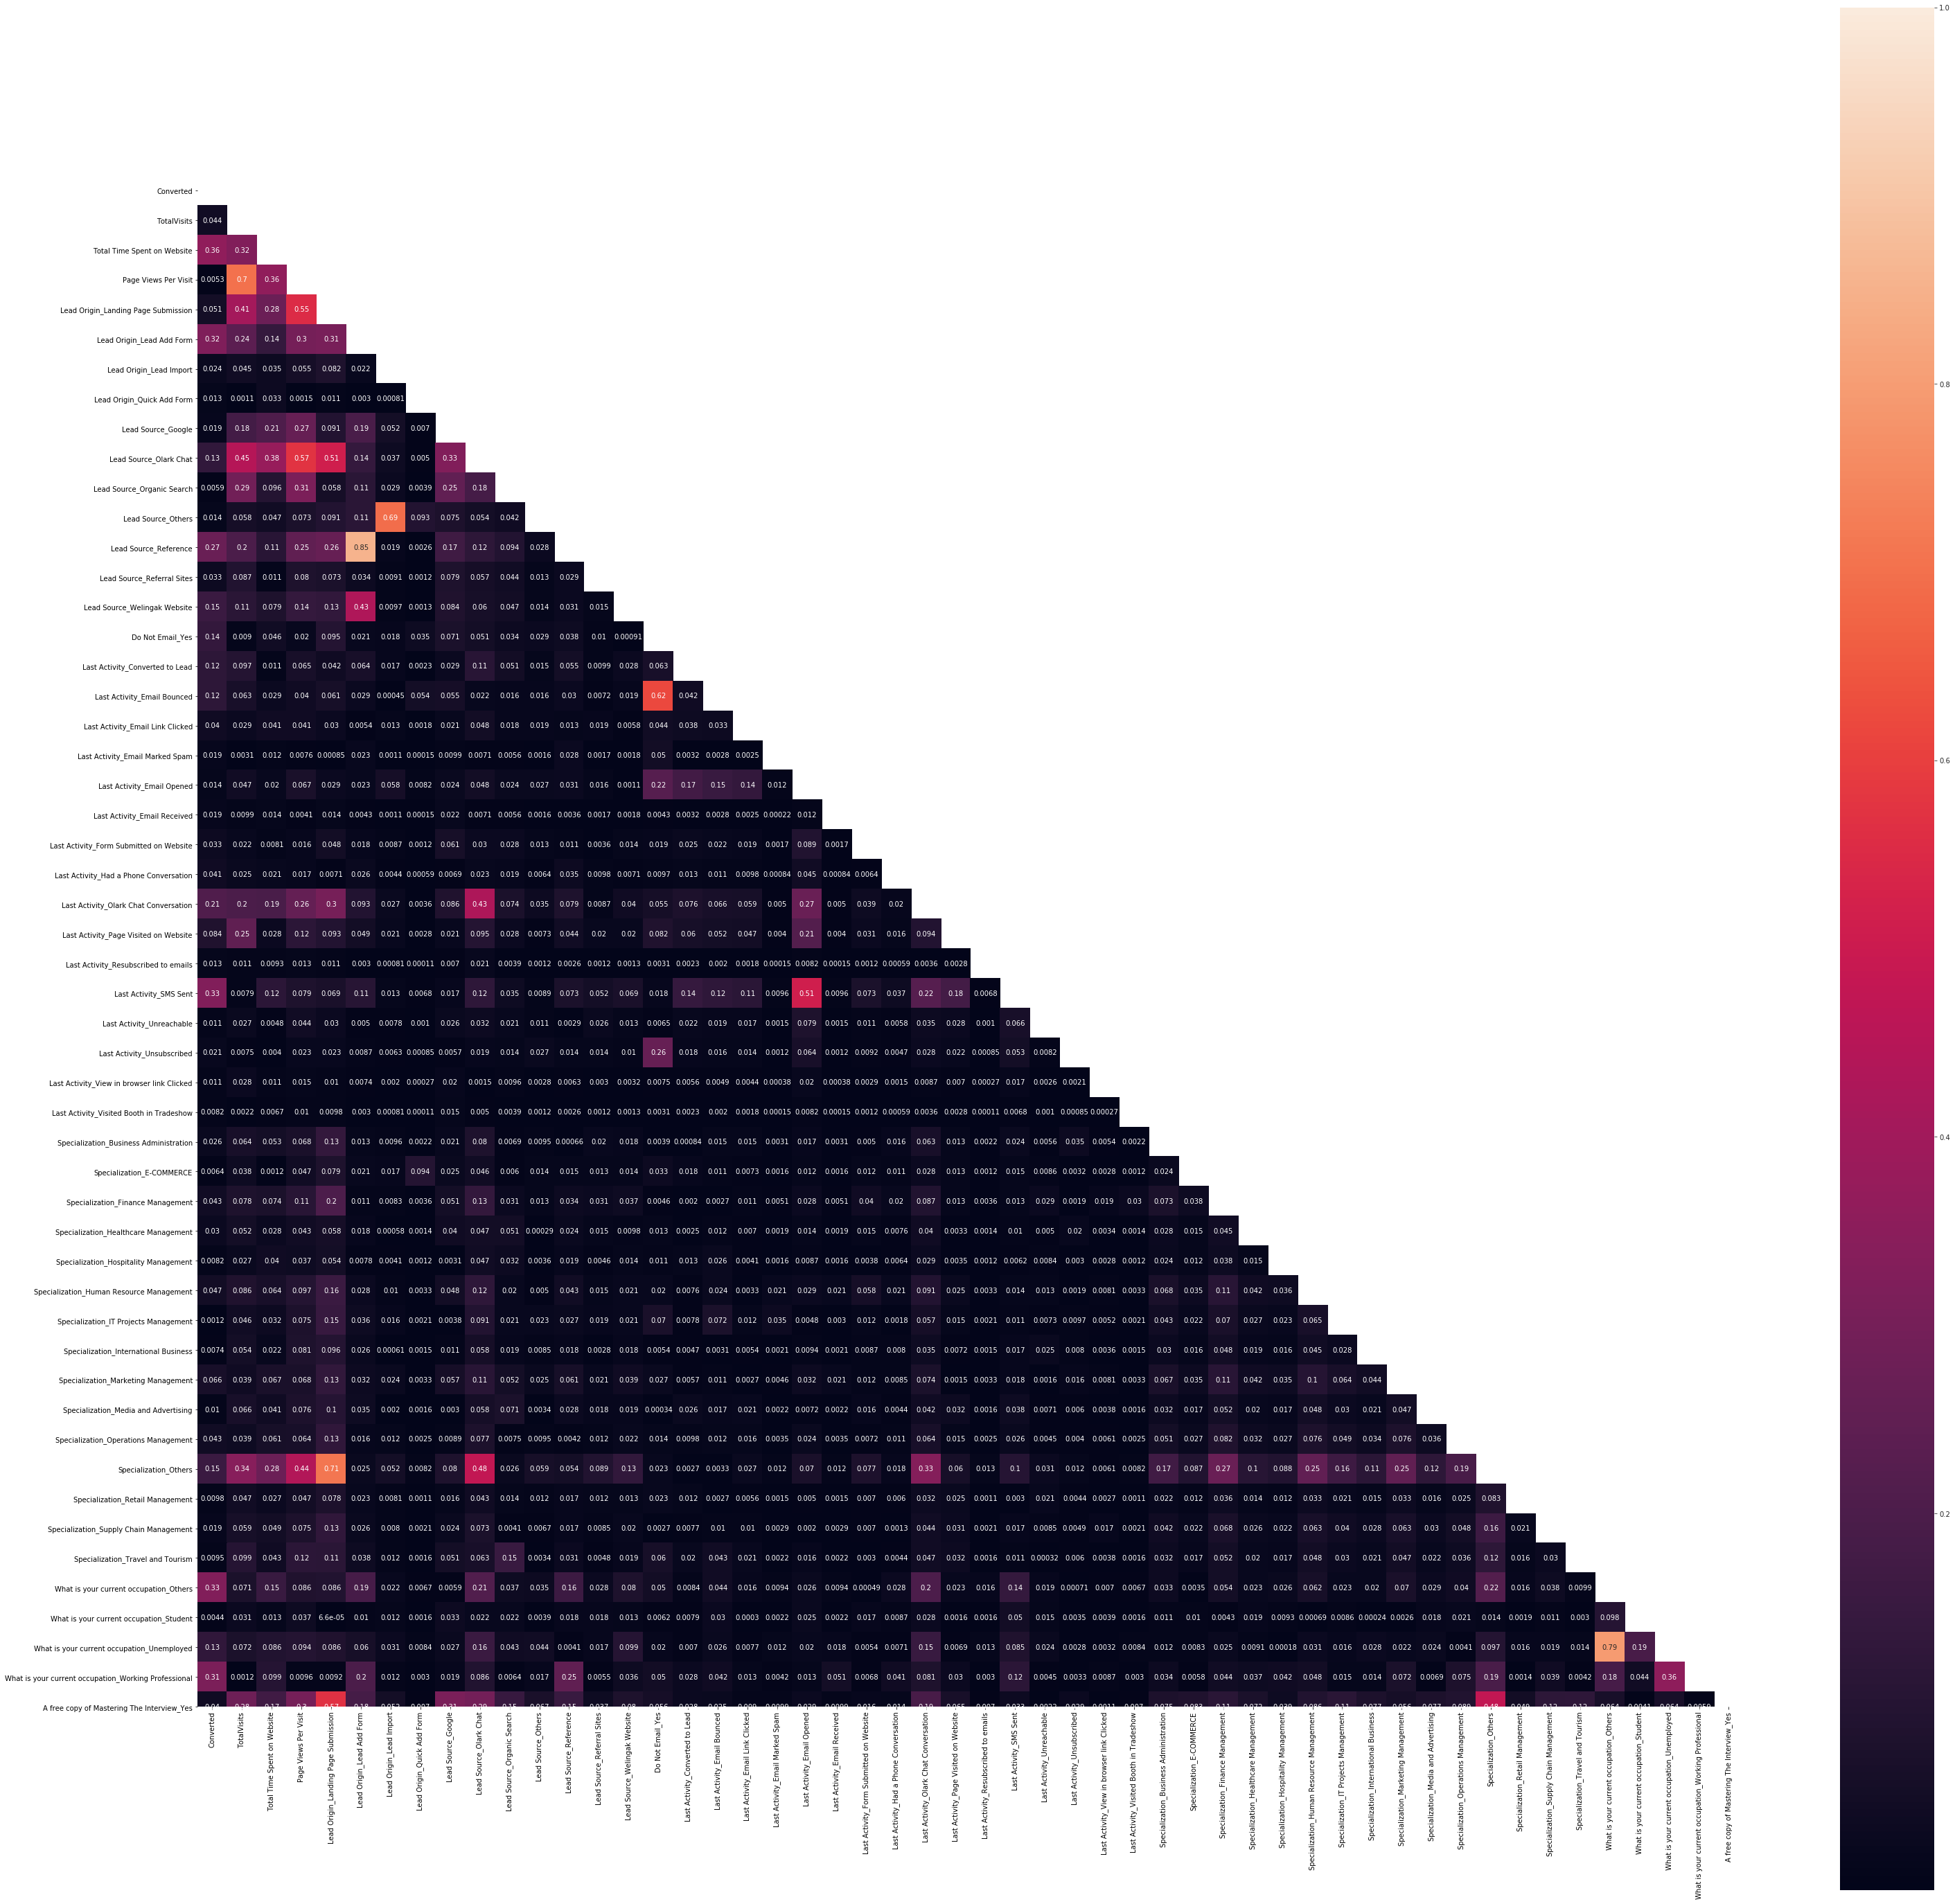

In [96]:
corr = Lead.drop(['Lead Number'],axis=1).corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 50))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, square=True);

In [97]:
# 'Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced',What is your current occupation_Others'

#### Dropping highly correlated dummy variables

In [98]:
X_train=X_train.drop(['Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced','What is your current occupation_Others'],axis=1)
X_test=X_test.drop(['Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced','What is your current occupation_Others'],axis=1)

After dropping highly correlated variables now let's check the correlation matrix again.

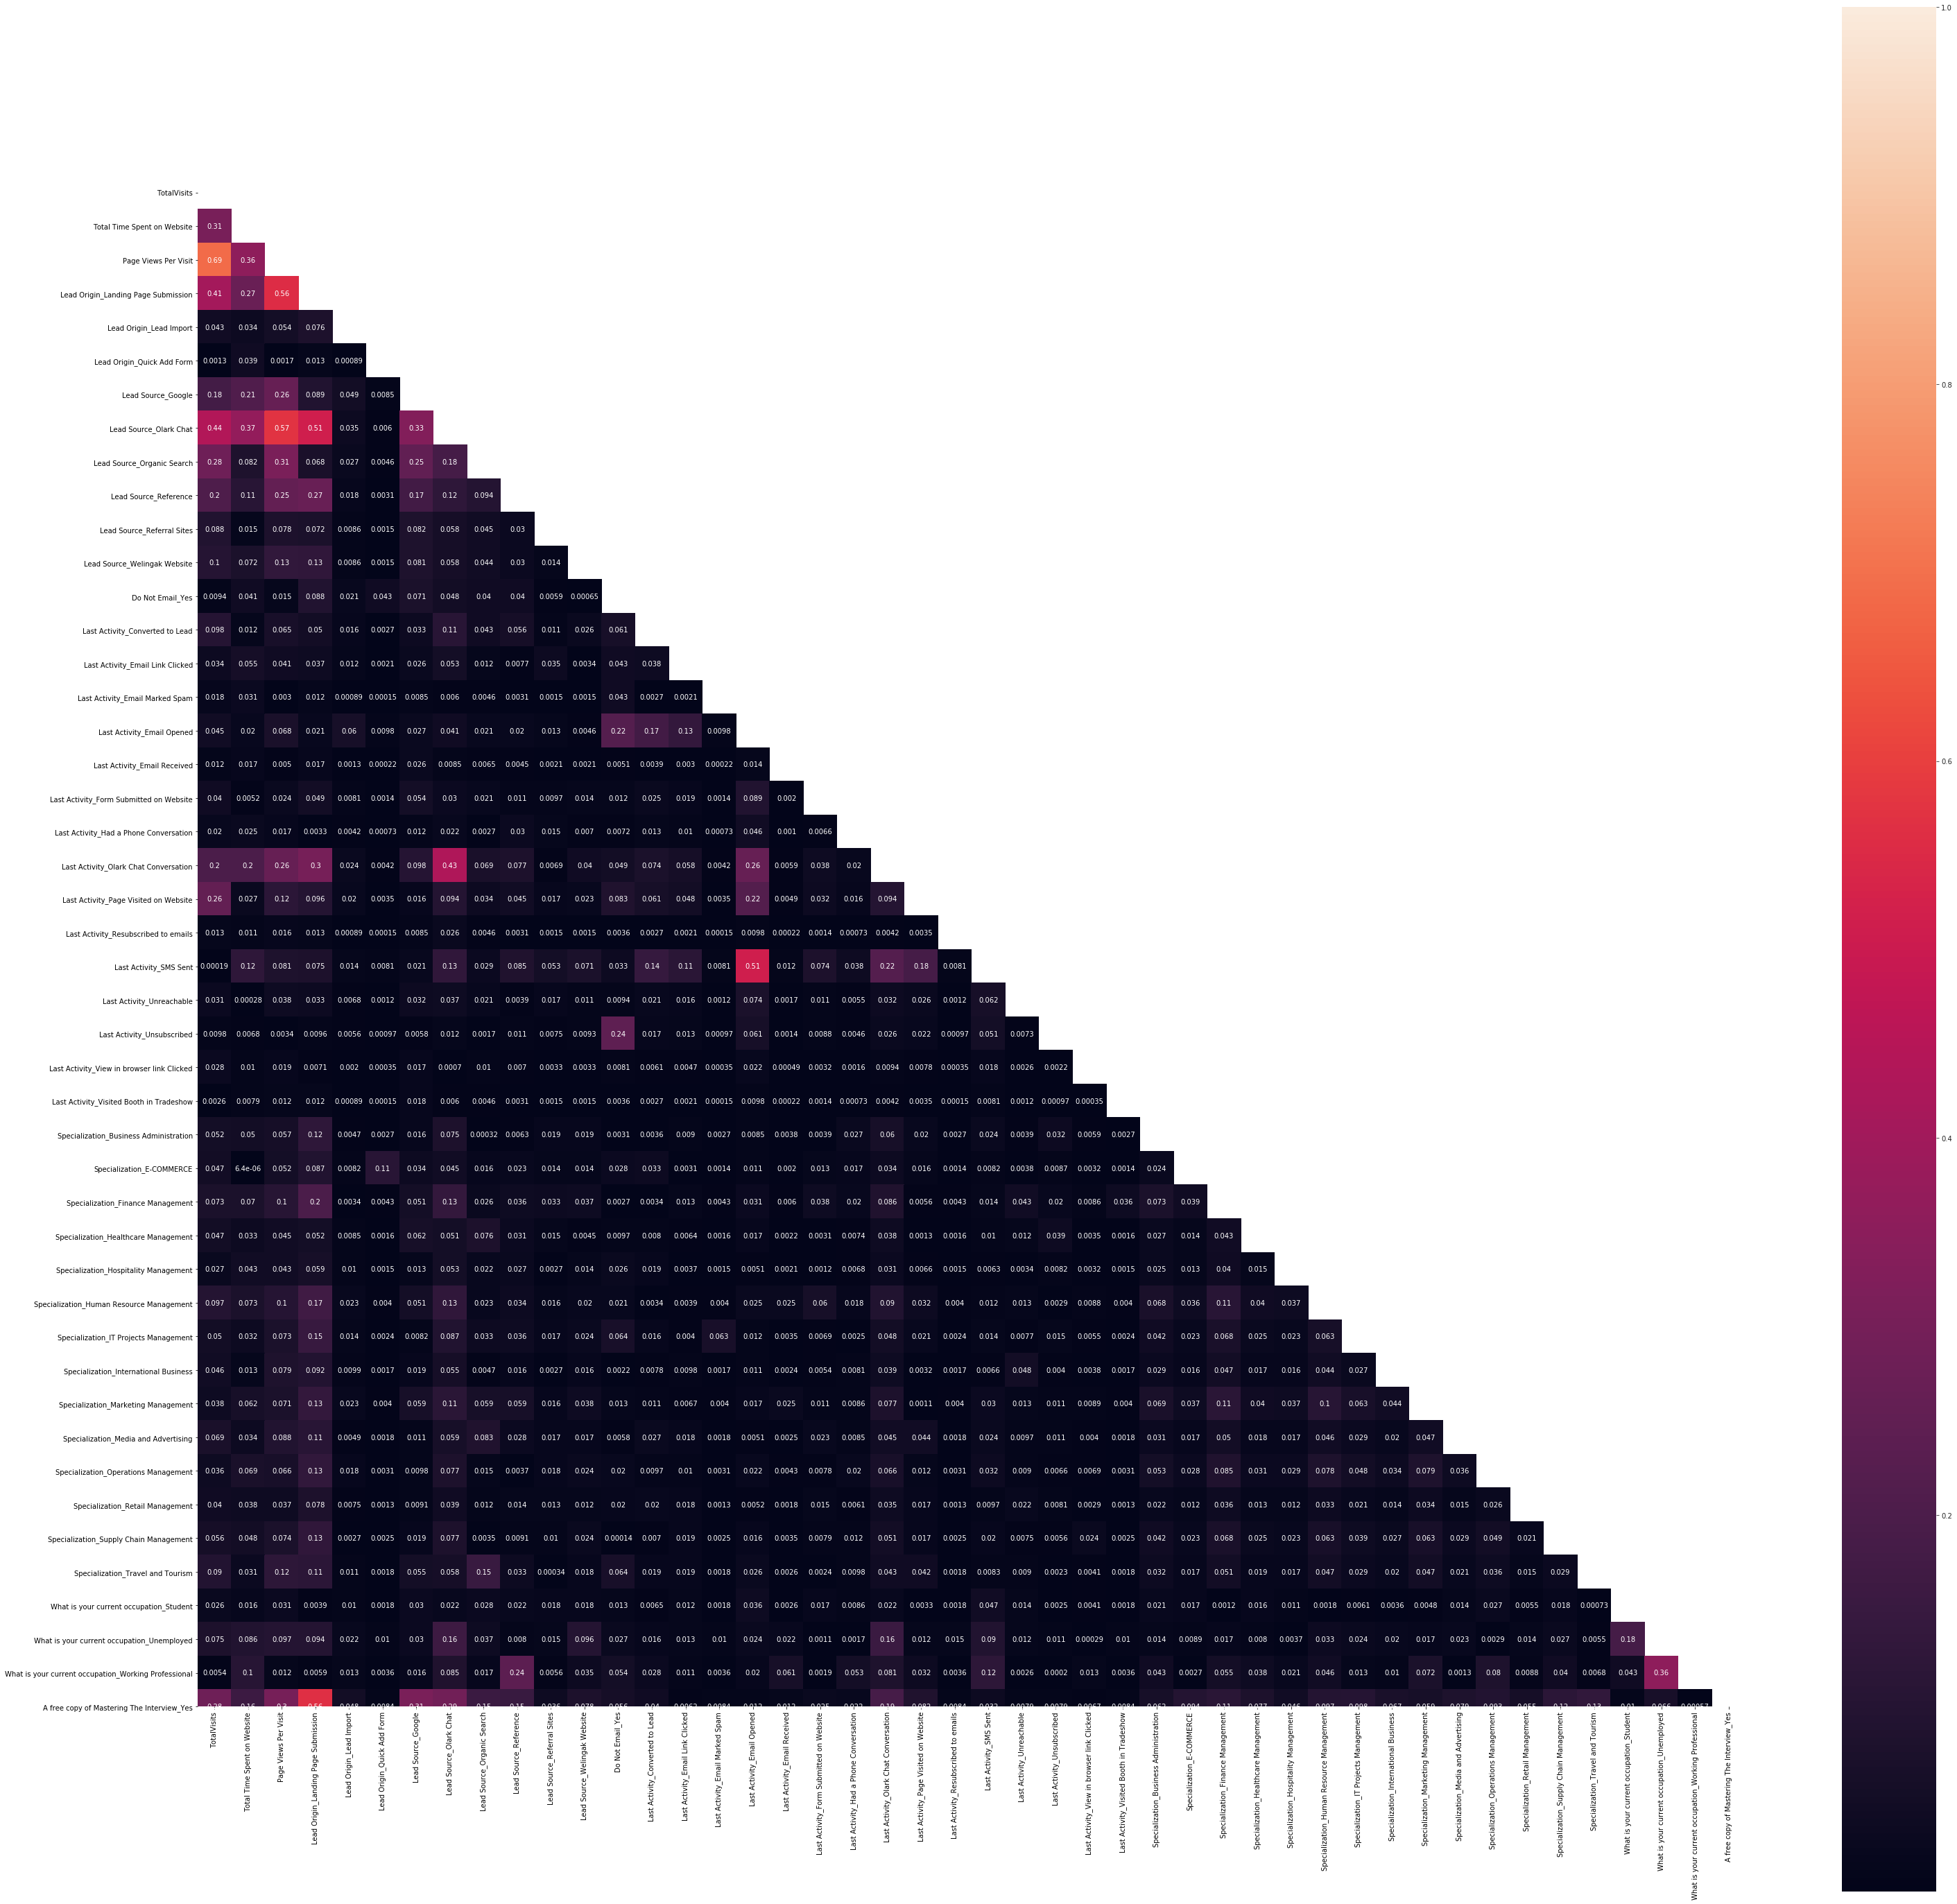

In [99]:
corr = X_train.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 50))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, square=True);

## 9: Model Building

In [100]:
#Importing relevant libraries
import statsmodels.api as sm

In [101]:
#Building the furst logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.2
Date:                Mon, 08 Mar 2021   Deviance:                       5216.4
Time:                        22:22:56   Pearson chi2:                 8.53e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6095      0.351     -7.433      0.000      -3.298      -1.921
TotalVisits                                              0.3023      0.049      6.197      0.000       0.207       0.398
Total Time Spent on Website                              1.0565      0.040     26.282      0.000       0.978       1.135
Page Views Per Visit                                    -0.3207      0.059     -5.479      0.000      -0.435      -0.206
Lead Origin_Landing Page Submission                     -0.6338      0.125     -5.070      0.000      -0.879      -0.389
Lead Origin_Lead Import                                 -0.7527      0.529     -1.422      0.155      -1.790       0.285
Lead Origin_Quick Add Form                              20.0442   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google                                       0.1056      0.112      0.947      0.344      -0.113       0.324
Lead Source_Olark Chat                                   0.9134      0.157      5.803      0.000       0.605       1.222
Lead Source_Organic Search                               0.0293      0.131      0.224      0.823      -0.227       0.286
Lead Source_Reference                                    2.8458      0.240     11.878      0.000       2.376       3.315
Lead Source_Referral Sites                              -0.0749      0.328     -0.228      0.819      -0.718       0.568
Lead Source_Welingak Website                             4.9729      0.737      6.743      0.000       3.527       6.418
Do Not Email_Yes                                        -1.1732      0.210     -5.597      0.000      -1.584      -0.762
Last Activity_Converted to Lead                         -0.7081      0.387     -1.829      0.067      -1.467       0.051
Last Activity_Email Link Clicked                         0.1211      0.389      0.311      0.756      -0.642       0.884
Last Activity_Email Marked Spam                         21.1123   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Email Opened                               0.6103      0.328      1.861      0.063      -0.032       1.253
Last Activity_Email Received                            19.4920   2.01e+04      0.001      0.999   -3.95e+04    3.95e+04
Last Activity_Form Submitted on Website                 -0.1325      0.467     -0.284      0.776      -1.047       0.782
Last Activity_Had a Phone Conversation                   2.5997      0.750      3.467      0.001       1.130       4.069
Last Activity_Olark Chat Conversation                   -0.7864      0.361     -2.178      0.029      -1.494      -0.079
Last Activity_Page Visited on Website                   -0

### Feature selection using RFE

In [102]:
#Importing relevant libraries
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [103]:
#Running RFE on train dataset to get the top 15 statistical significant features
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [104]:
rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', False, 28),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Marked Spam', False, 23),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Email Received', False, 26),
 ('Last Activity_Form Submitted on Website', False, 20),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_Resubscr

In [106]:
(rfe.support_==True).sum()

15

In [107]:
(rfe.support_==False).sum()

31

In [108]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [109]:
#Train dataset after performing RFE
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Hospitality Management,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,-0.691418,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,1.365219,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3934,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79,0.404601,0,1,0,0,0,0,0,0,0,0,1,0,0,1
8039,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6936,-0.449891,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [110]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Special

##### Assessing the model with StatsModels

In [111]:
#Importing relevant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [113]:
#Building the 2nd model
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.5
Date:                Mon, 08 Mar 2021   Deviance:                       5360.9
Time:                        22:22:58   Pearson chi2:                 8.50e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2192      0.087    -25.371      0.000      -2.391      -2.048
Total Time Spent on Website                              1.0598      0.039     27.119      0.000       0.983       1.136
Lead Source_Olark Chat                                   1.2182      0.103     11.815      0.000       1.016       1.420
Lead Source_Reference                                    3.4195      0.203     16.830      0.000       3.021       3.818
Lead Source_Welingak Website                             5.2342      0.724      7.225      0.000       3.814       6.654
Do Not Email_Yes                                        -1.4194      0.169     -8.423      0.000      -1.750      -1.089
Last Activity_Converted to Lead                         -1.2421      0.219     -5.670      0.000      -1.671      -0.813
Last Activity_Had a Phone Conversation                   2.1703      0.676      3.209      0.001       0.845       3.496
Last Activity_Olark Chat Conversation                   -1.2262      0.165     -7.412      0.000      -1.550      -0.902
Last Activity_Resubscribed to emails                    22.5054   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.2213      0.074     16.499      0.000       1.076       1.366
Last Activity_Unsubscribed                               1.1976      0.461      2.596      0.009       0.294       2.102
Specialization_Hospitality Management                   -0.8888      0.319     -2.786      0.005      -1.514      -0.264
What is your current occupation_Student                  1.2294      0.235      5.230      0.000       0.769       1.690
What is your current occupation_Unemployed               1.1366      0.085     13.387      0.000       0.970       1.303
What is your current occupation_Working Professional     3.6567      0.197     18.557      0.000       3.270       4.043
========================================================================================================================
"""

In [114]:
#checking the VIF of the featuers in the model
checkVIF(X_train_sm)

,Features,VIF
0,const,5.04
2,Lead Source_Olark Chat,1.45
15,What is your current occupation_Working Profes...,1.34
14,What is your current occupation_Unemployed,1.32
8,Last Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.25
3,Lead Source_Reference,1.14
10,Last Activity_SMS Sent,1.12
5,Do Not Email_Yes,1.09
11,Last Activity_Unsubscribed,1.07


In [115]:
# drop column 'Last Activity_Resubscribed to emails	' due to high p value
X_train_rfe2=X_train_rfe.drop('Last Activity_Resubscribed to emails',axis=1)


In [116]:
#Bulding the 3rd model
X_train_sm2=sm.add_constant(X_train_rfe2)
logm3=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.5
Date:                Mon, 08 Mar 2021   Deviance:                       5365.1
Time:                        22:22:58   Pearson chi2:                 8.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2147      0.087    -25.354      0.000      -2.386      -2.044
Total Time Spent on Website                              1.0594      0.039     27.116      0.000       0.983       1.136
Lead Source_Olark Chat                                   1.2232      0.103     11.872      0.000       1.021       1.425
Lead Source_Reference                                    3.4195      0.203     16.832      0.000       3.021       3.818
Lead Source_Welingak Website                             5.2346      0.724      7.226      0.000       3.815       6.654
Do Not Email_Yes                                        -1.4200      0.168     -8.428      0.000      -1.750      -1.090
Last Activity_Converted to Lead                         -1.2426      0.219     -5.674      0.000      -1.672      -0.813
Last Activity_Had a Phone Conversation                   2.1693      0.676      3.208      0.001       0.844       3.495
Last Activity_Olark Chat Conversation                   -1.2312      0.165     -7.445      0.000      -1.555      -0.907
Last Activity_SMS Sent                                   1.2195      0.074     16.481      0.000       1.075       1.365
Last Activity_Unsubscribed                               1.1960      0.461      2.593      0.010       0.292       2.100
Specialization_Hospitality Management                   -0.8886      0.319     -2.786      0.005      -1.514      -0.264
What is your current occupation_Student                  1.2243      0.235      5.210      0.000       0.764       1.685
What is your current occupation_Unemployed               1.1323      0.085     13.352      0.000       0.966       1.298
What is your current occupation_Working Professional     3.6524      0.197     18.540      0.000       3.266       4.038
========================================================================================================================
"""

In [117]:
#checking the VIF of the featuers in the model
checkVIF(X_train_sm2)

,Features,VIF
0,const,5.04
2,Lead Source_Olark Chat,1.45
14,What is your current occupation_Working Profes...,1.34
13,What is your current occupation_Unemployed,1.32
8,Last Activity_Olark Chat Conversation,1.30
1,Total Time Spent on Website,1.25
3,Lead Source_Reference,1.14
9,Last Activity_SMS Sent,1.12
5,Do Not Email_Yes,1.09
10,Last Activity_Unsubscribed,1.07


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

1871    0.310625
6795    0.254190
3516    0.356241
8105    0.829693
3934    0.310625
4844    0.990347
3297    0.135208
8071    0.998830
987     0.056496
7423    0.902822
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31062514, 0.25418958, 0.35624113, 0.82969343, 0.31062514,
       0.99034746, 0.13520836, 0.99882996, 0.05649553, 0.90282187])

## 10: Model Evaluation

#### Creating a dataframe with the actual converted column and the predicted convertion probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})

y_train_pred_final.head()

,Converted,Lead_Score
0,0,0.310625
1,0,0.254190
2,0,0.356241
3,0,0.829693
4,0,0.310625


##### Creating new column 'predicted' with 1 if Lead_Score > 0.5 else 0

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Score,predicted
0,0,0.310625,0
1,0,0.254190,0
2,0,0.356241,0
3,0,0.829693,1
4,0,0.310625,0


In [122]:
from sklearn import metrics

In [123]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3564,  438],
       [ 762, 1704]], dtype=int64)

In [124]:
# Predicted          0        1
# Actual
#  0               3564      438
#  1               762     1704  

In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8144712430426716


In [126]:
# Let's check the Recall.
# Recall=TP/(TP+FN)
1704/(1704+762)

0.6909975669099757

### Metrics other than Accuracy

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6909975669099757

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8905547226386806

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10944527736131934


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.7955182072829131


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8238557558945908


## 11: Plotting the ROC Curve

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

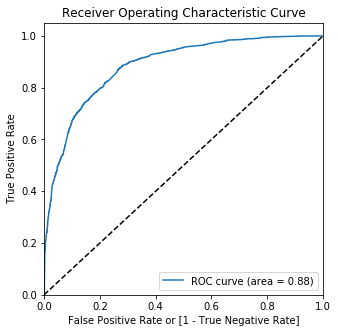

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

* High Area under curve of 0.88 indicated the good performance of present model 
* And our graph is leaned towards the left side of the border which means we have good accuracy.

## 12: Finding Optimal Cutoff Point

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.310625,0,1,1,1,1,0,0,0,0,0,0
1,0,0.254190,0,1,1,1,0,0,0,0,0,0,0
2,0,0.356241,0,1,1,1,1,0,0,0,0,0,0
3,0,0.829693,1,1,1,1,1,1,1,1,1,1,0
4,0,0.310625,0,1,1,1,1,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.592301  0.979724  0.353573
0.2   0.2  0.755102  0.911192  0.658921
0.3   0.3  0.786178  0.869019  0.735132
0.4   0.4  0.807514  0.757908  0.838081
0.5   0.5  0.814471  0.690998  0.890555
0.6   0.6  0.803340  0.623277  0.914293
0.7   0.7  0.779685  0.509327  0.946277
0.8   0.8  0.760668  0.418086  0.971764
0.9   0.9  0.714904  0.272506  0.987506


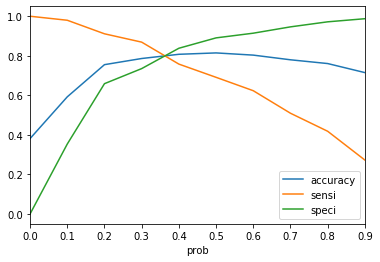

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.310625,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.254190,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.356241,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.829693,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.310625,0,1,1,1,1,0,0,0,0,0,0,0


In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7999381570810142

In [141]:
# Confusion Matrix for the optimal cut-off of 0.35
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3228,  774],
       [ 520, 1946]], dtype=int64)

In [142]:
# Confusion Matrix for the optimal cut-off of 0.35
# Predicted          0        1
# Actual
#  0               3228     774
#  1               520     1946  

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7891321978913219

In [145]:
# Let us calculate Specificity
TN / float(TN+FP)

0.8065967016491754

In [147]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7154411764705882


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8612593383137673


## Precision and Recall

In [149]:
#Confusion Matrix for an optimal cut-off of 0.35
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3228,  774],
       [ 520, 1946]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision
TP / TP + FP

In [151]:
TP/(TP+FP)

0.7154411764705882

### Recall

In [152]:
# Recall
TP/(TP+FN)

0.7891321978913219

- Our one of the Business Objectives was to achieve a Recall of 80% which means that the business wanted most of the hot leads to be identified so that the sales team can take appropriate actions to convert those hot leads.
- Therefore, our final model is now apt enough to identify all such hot leads for the sales team.

## 13:Making Predictions (on the Test dataset)

In [153]:
col=X_train_rfe2.columns

In [154]:
X_test_rfe2=X_test[col]

In [155]:
X_test_sm = sm.add_constant(X_test_rfe2)

In [156]:
y_test_pred = res.predict(X_test_sm)

In [157]:
y_test_pred[:10]

4269    0.506663
2376    0.932050
7766    0.648860
9199    0.116253
4359    0.802037
9186    0.595189
1631    0.485820
8963    0.182288
8007    0.023466
5324    0.379717
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
y_pred_1.rename(columns={0:'Lead_Score'},inplace=True)

In [160]:
y_pred_1

,Lead_Score
4269,0.506663
2376,0.932050
7766,0.648860
9199,0.116253
4359,0.802037
...,...
8649,0.069749
2152,0.309831
7101,0.310625
5331,0.189136


In [161]:
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)
y_pred_final

,Converted,Lead_Score
4269,1,0.506663
2376,1,0.932050
7766,1,0.648860
9199,0,0.116253
4359,1,0.802037
...,...,...
8649,0,0.069749
2152,1,0.309831
7101,0,0.310625
5331,0,0.189136


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 0.35 else 0)

In [163]:
y_pred_final

,Converted,Lead_Score,final_predicted
4269,1,0.506663,1
2376,1,0.932050,1
7766,1,0.648860,1
9199,0,0.116253,0
4359,1,0.802037,1
...,...,...,...
8649,0,0.069749,0
2152,1,0.309831,0
7101,0,0.310625,0
5331,0,0.189136,0


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8051948051948052

In [165]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1360,  317],
       [ 223,  872]], dtype=int64)

In [166]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

### Precision of test set

In [167]:
# Precision
TP/(TP+FP)

0.7333894028595458

### Recall of test set

In [168]:
# Recall
TP / (TP + FN)

0.7963470319634703

**The results shows that our model is very much stable even on unknown datasets.**

## Thank You!